# **Banking Marketing Campaign**

## *Business Insight*

#### Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

## *Description of the problem*

#### The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

#### To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

In [24]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

### **Step 1:** Loading the dataset

In [2]:
# Load the dataset
bank_marketing_campaign_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ';')
bank_marketing_campaign_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### **Step 2:** Exploratory Data Analyis

In [3]:
# information of the dataset
bank_marketing_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

DataFrame information:
- The dataframe has 41188 rows and 21 columns
- Aparently there is not missing information
- There are 10 numerical variables (datatype: int and float) and 11 categorical variables

In [4]:
# Find the colums with unique values
bank_marketing_campaign_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
# Find the colums with null values
bank_marketing_campaign_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Repeated and null values:
- There is not null values on the dataframe
- None of the colums have unique values, so we cannot drop them

In [6]:
# We are not going to use the duration, campaign, pdays and previous columns because they are related to the last contact of the current campaign, so they are not useful for predicting the target variable
bank_marketing_campaign_df = bank_marketing_campaign_df.drop(['duration', 'campaign', 'pdays', 'previous'], axis = 1)

In [8]:
# Describe the dataframe
bank_marketing_campaign_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

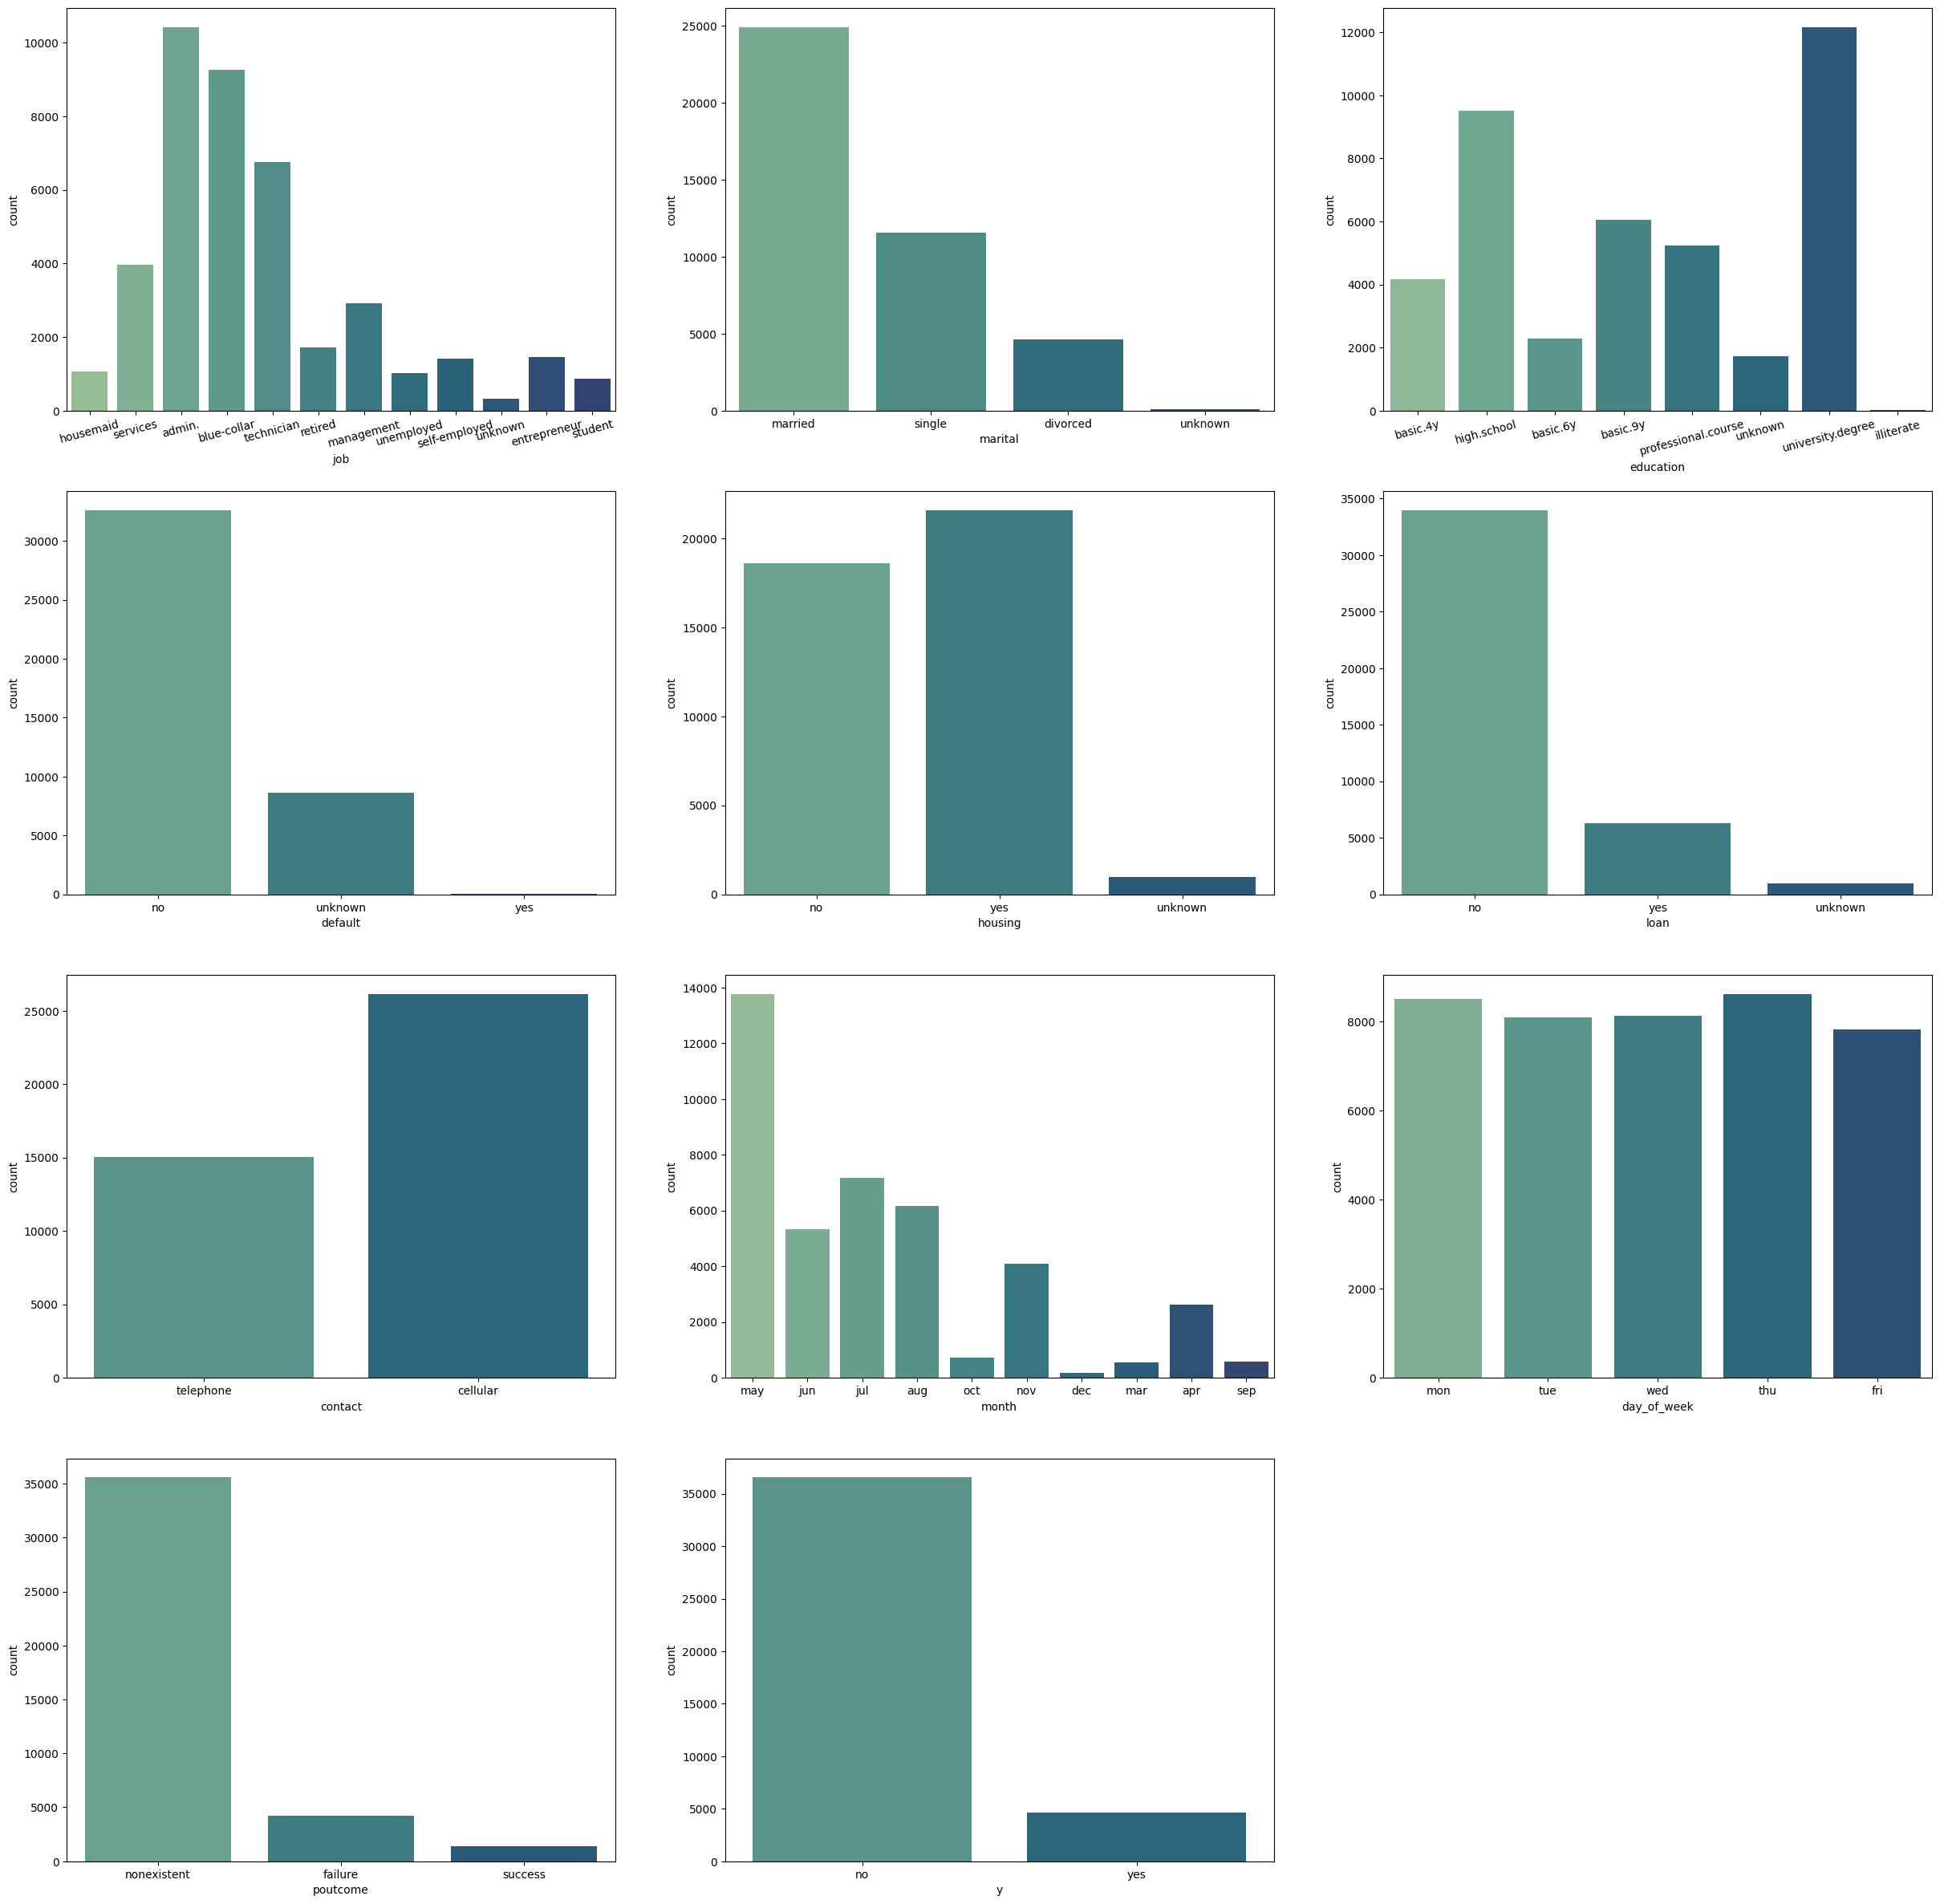

In [9]:
# Visualize the categorical variables with a countplot
fig, ax = plt.subplots(4, 3, figsize=(30, 30))

# Countplot of the job column
sns.countplot(ax = ax[0,0], data = bank_marketing_campaign_df, x = 'job', palette="crest")
# Rotate x-axis labels
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=15)
# Countplot of the marital column
sns.countplot(ax = ax[0,1], data = bank_marketing_campaign_df, x = 'marital', palette="crest")
# Countplot of the education column
sns.countplot(ax = ax[0,2], data = bank_marketing_campaign_df, x = 'education', palette="crest")
# Rotate x-axis labels
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=15)
# Countplot of the default column
sns.countplot(ax = ax[1,0], data = bank_marketing_campaign_df, x = 'default', palette="crest")
# Countplot of the housing column
sns.countplot(ax = ax[1,1], data = bank_marketing_campaign_df, x = 'housing', palette="crest")
# Countplot of the loan column
sns.countplot(ax = ax[1,2], data = bank_marketing_campaign_df, x = 'loan', palette="crest")
# Countplot of the contact column
sns.countplot(ax = ax[2,0], data = bank_marketing_campaign_df, x = 'contact', palette="crest")
# Countplot of the month column
sns.countplot(ax = ax[2,1], data = bank_marketing_campaign_df, x = 'month', palette="crest")
# Countplot of the day_of_week column
sns.countplot(ax = ax[2,2], data = bank_marketing_campaign_df, x = 'day_of_week', palette="crest")
# Countplot of the poutcome column
sns.countplot(ax = ax[3,0], data = bank_marketing_campaign_df, x = 'poutcome', palette="crest")
# Countplot of the y column
sns.countplot(ax = ax[3,1], data = bank_marketing_campaign_df, x = 'y', palette="crest")
# Remove the empty subplots
fig.delaxes(ax[3,2])

# Display the plot
plt.show()

Observation on the categorical visualization:
- The education column has many catergories (basic.4y, basic.6y and basic.9y) that we can group in an only category (basic)

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

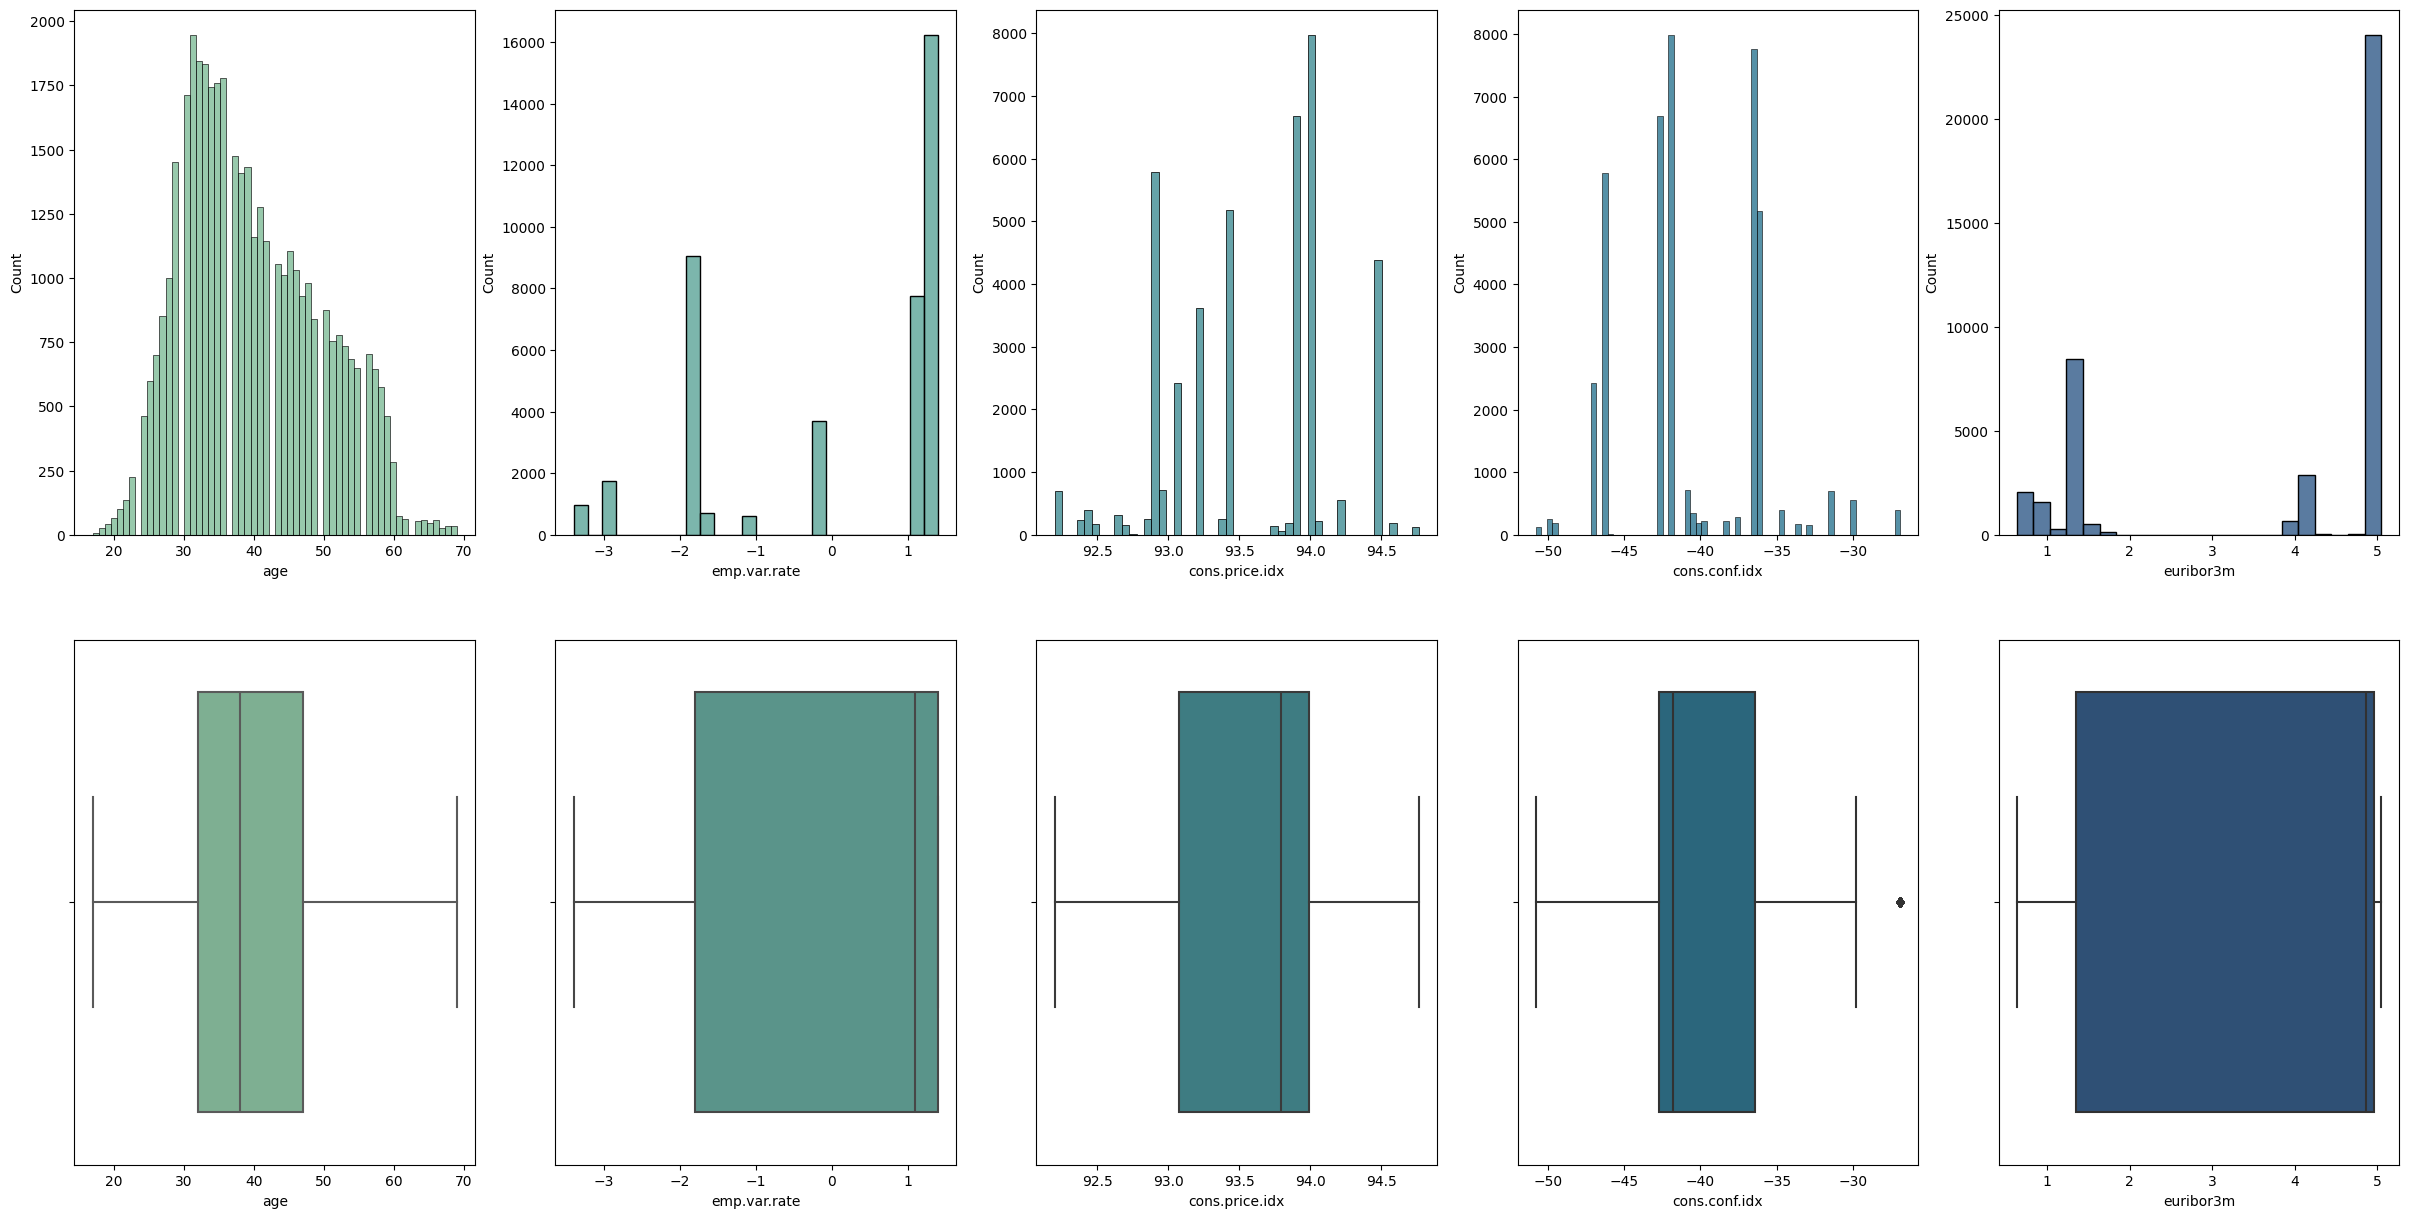

In [15]:
# Visualize the numerical variables with a histogram and boxplot
fig, ax = plt.subplots(2, 5, figsize=(30, 15))

# set the color palette
color = sns.color_palette("crest", 5)

# Histogram of the age column
sns.histplot(ax = ax[0,0], data = bank_marketing_campaign_df, x = 'age', color=color[0])
# Boxplot of the age column
sns.boxplot(ax = ax[1,0], data = bank_marketing_campaign_df, x = 'age', color=color[0])
# Histogram of the poutcome column
sns.histplot(ax = ax[0,1], data = bank_marketing_campaign_df, x = 'emp.var.rate', color=color[1])
# Boxplot of the poutcome column
sns.boxplot(ax = ax[1,1], data = bank_marketing_campaign_df, x = 'emp.var.rate', color=color[1])
# Histogram of the cons.price.idx column
sns.histplot(ax = ax[0,2], data = bank_marketing_campaign_df, x = 'cons.price.idx', color=color[2])
# Boxplot of the cons.price.idx column
sns.boxplot(ax = ax[1,2], data = bank_marketing_campaign_df, x = 'cons.price.idx', color=color[2])
# Histogram of the cons.conf.idx column
sns.histplot(ax = ax[0,3], data = bank_marketing_campaign_df, x = 'cons.conf.idx', color=color[3])
# Boxplot of the cons.conf.idx column
sns.boxplot(ax = ax[1,3], data = bank_marketing_campaign_df, x = 'cons.conf.idx', color=color[3])
# Histogram of the euribor3m column
sns.histplot(ax = ax[0,4], data = bank_marketing_campaign_df, x = 'euribor3m', color=color[4])
# Boxplot of the euribor3m column
sns.boxplot(ax = ax[1,4], data = bank_marketing_campaign_df, x = 'euribor3m', color=color[4])


# Display the plot
plt.show()

Observation on the numerical visualization
- The ages are between 17 and 98 years old, with a median of 38 years old. The distribution is slightly skewed to the right, with a few outliers above 70 years old.
- The duration and the campaign columns are highly skewed to the right and has a lot of outliers.
- The p.days column has a lot of values that are 999, which means that the customer was not contacted before.
- The previous column shows that the campaign was not successful because most of the clients were not contacted before the campaign

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

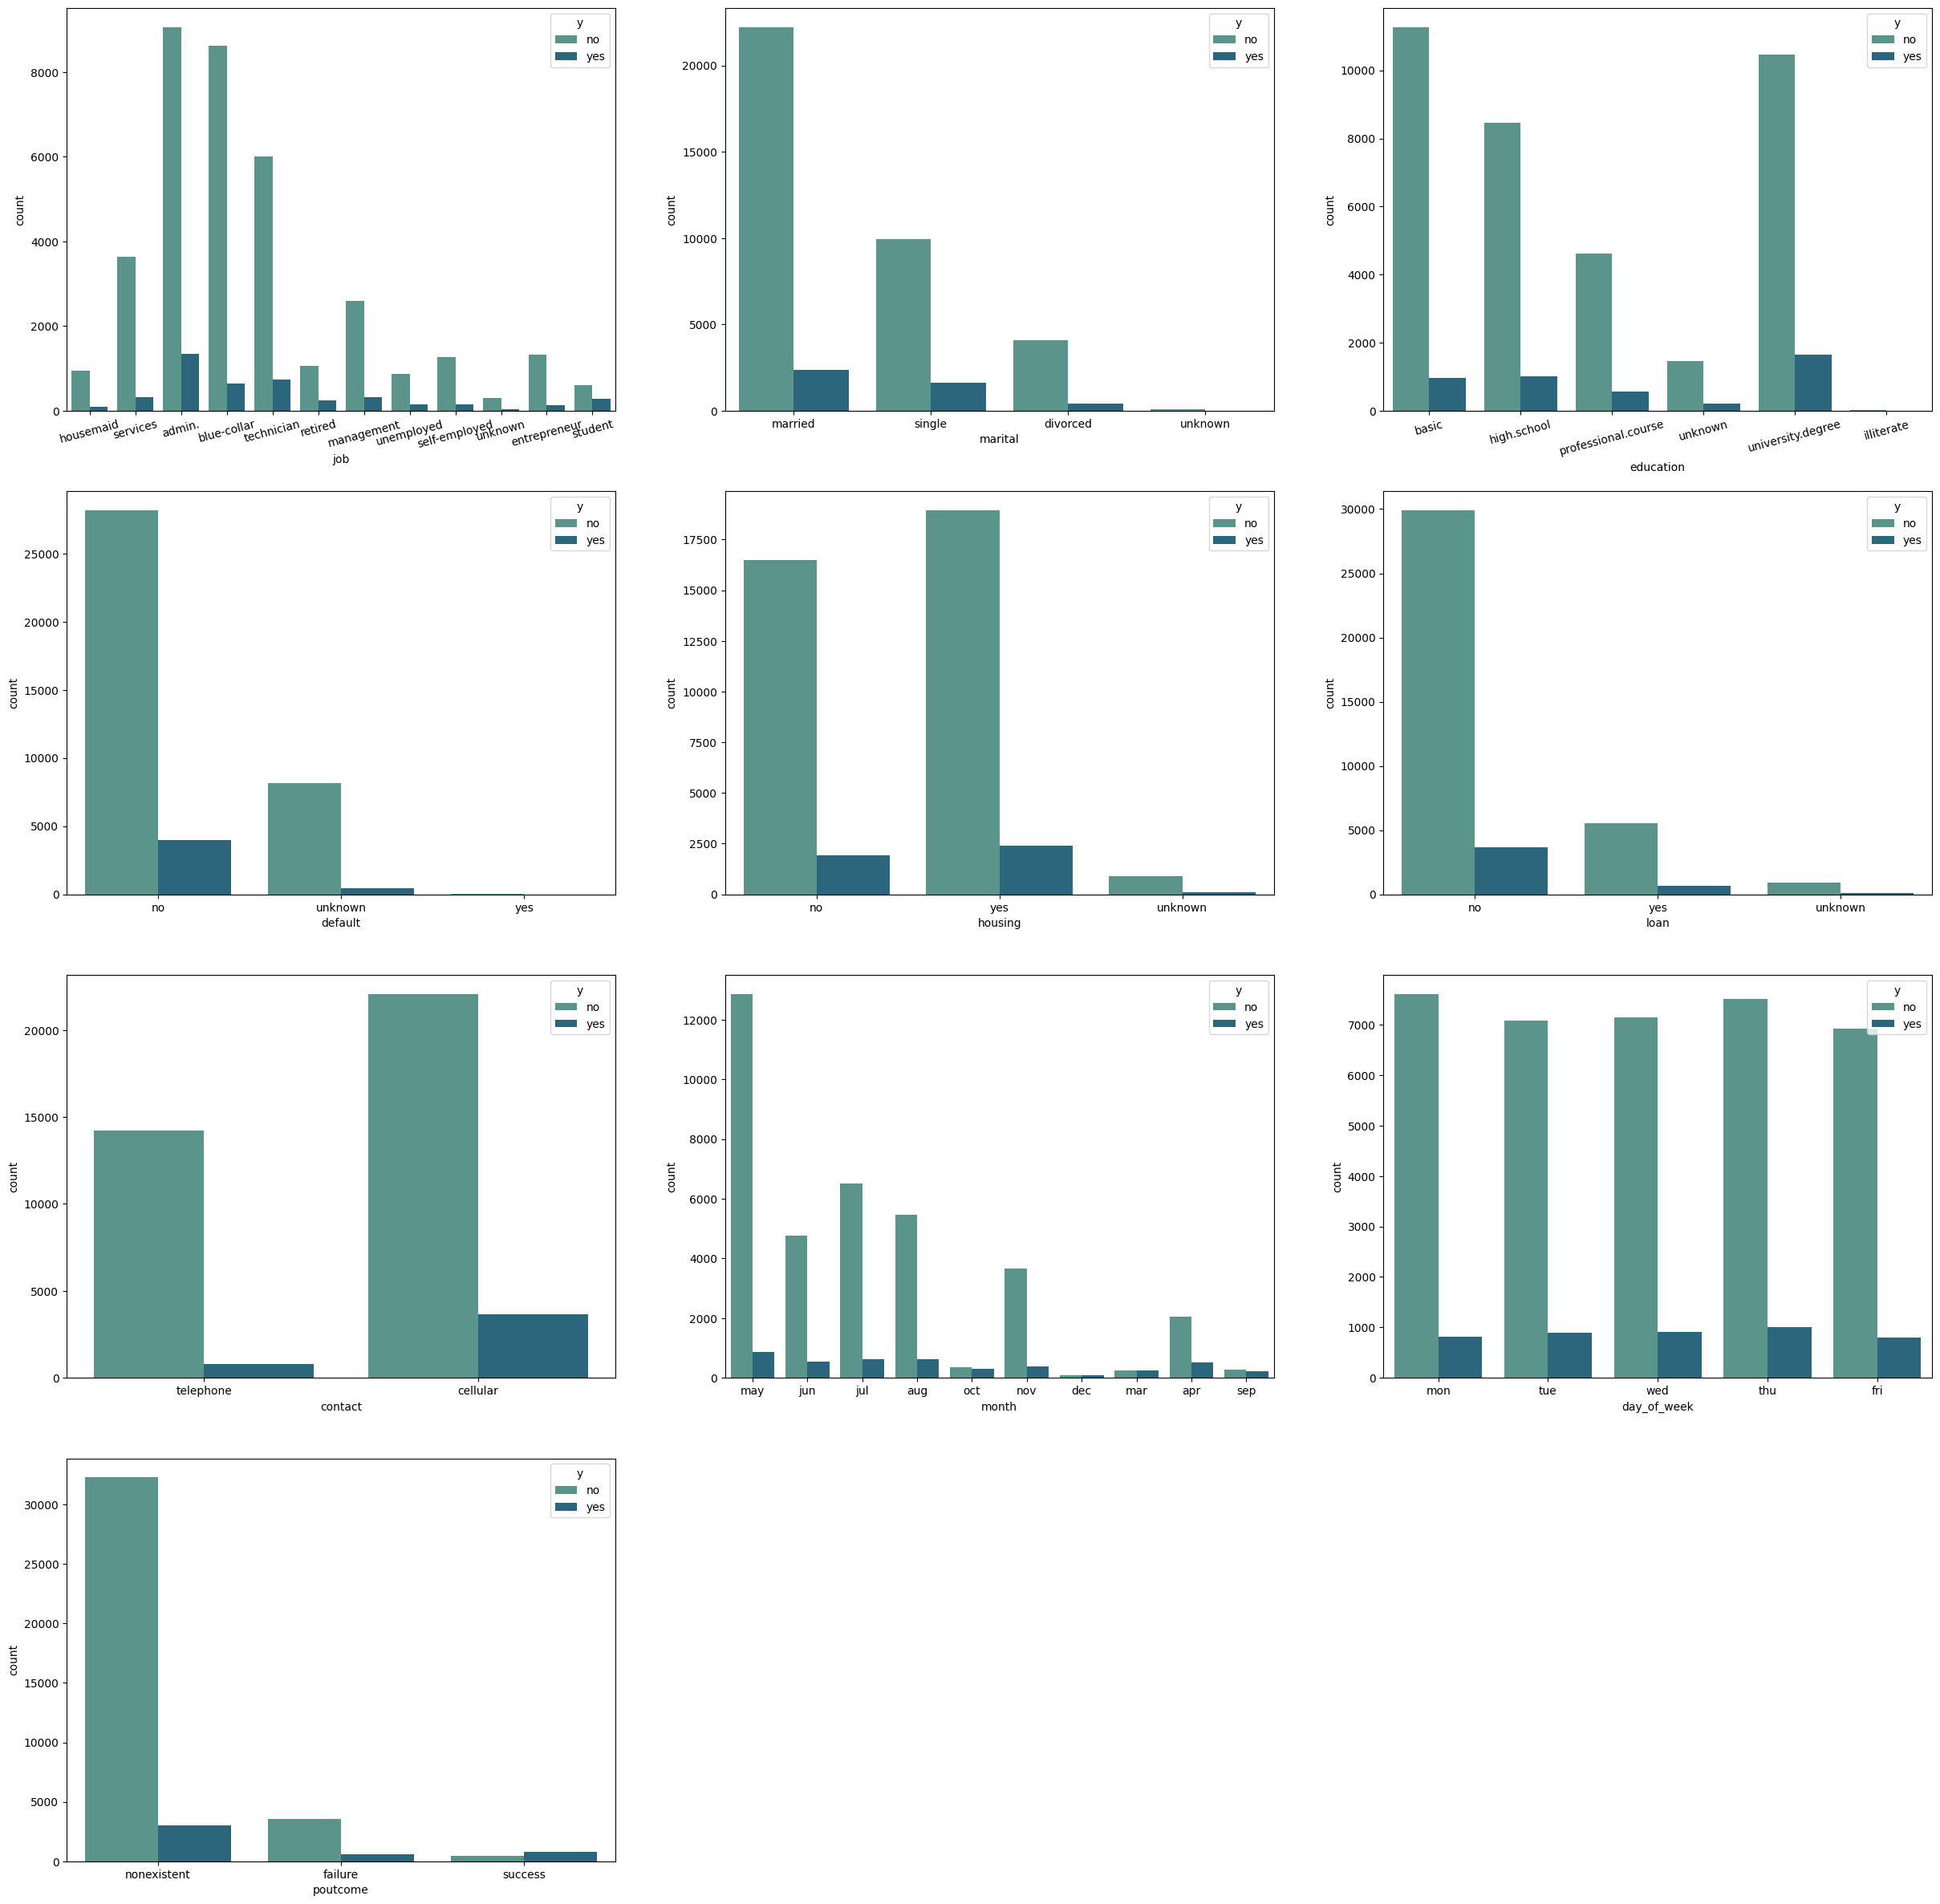

In [19]:
# For multivariate analysis, we are going to correlate all the variables with the target variable
# Relationship between the categorical variables and the target variable
fig, ax = plt.subplots(4, 3, figsize=(30, 30))

# set the colors
color = sns.color_palette("crest", 5)

# Countplot of the job column
sns.countplot(ax = ax[0,0], data = bank_marketing_campaign_df, x = 'job', hue = 'y', palette="crest")
# Rotate x-axis labels
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=15)
# Countplot of the marital column
sns.countplot(ax = ax[0,1], data = bank_marketing_campaign_df, x = 'marital', hue = 'y', palette="crest")
# Countplot of the education column
sns.countplot(ax = ax[0,2], data = bank_marketing_campaign_df, x = 'education', hue = 'y', palette="crest")
# Rotate x-axis labels
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=15)
# Countplot of the default column
sns.countplot(ax = ax[1,0], data = bank_marketing_campaign_df, x = 'default', hue = 'y', palette="crest")
# Countplot of the housing column
sns.countplot(ax = ax[1,1], data = bank_marketing_campaign_df, x = 'housing', hue = 'y', palette="crest")
# Countplot of the loan column
sns.countplot(ax = ax[1,2], data = bank_marketing_campaign_df, x = 'loan', hue = 'y', palette="crest")
# Countplot of the contact column
sns.countplot(ax = ax[2,0], data = bank_marketing_campaign_df, x = 'contact', hue = 'y', palette="crest")
# Countplot of the month column
sns.countplot(ax = ax[2,1], data = bank_marketing_campaign_df, x = 'month', hue = 'y', palette="crest")
# Countplot of the day_of_week column
sns.countplot(ax = ax[2,2], data = bank_marketing_campaign_df, x = 'day_of_week', hue = 'y', palette="crest")
# Countplot of the poutcome column
sns.countplot(ax = ax[3,0], data = bank_marketing_campaign_df, x = 'poutcome', hue = 'y', palette="crest")
# Remove the empty subplots
fig.delaxes(ax[3,1])
fig.delaxes(ax[3,2])

# Display the plot
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

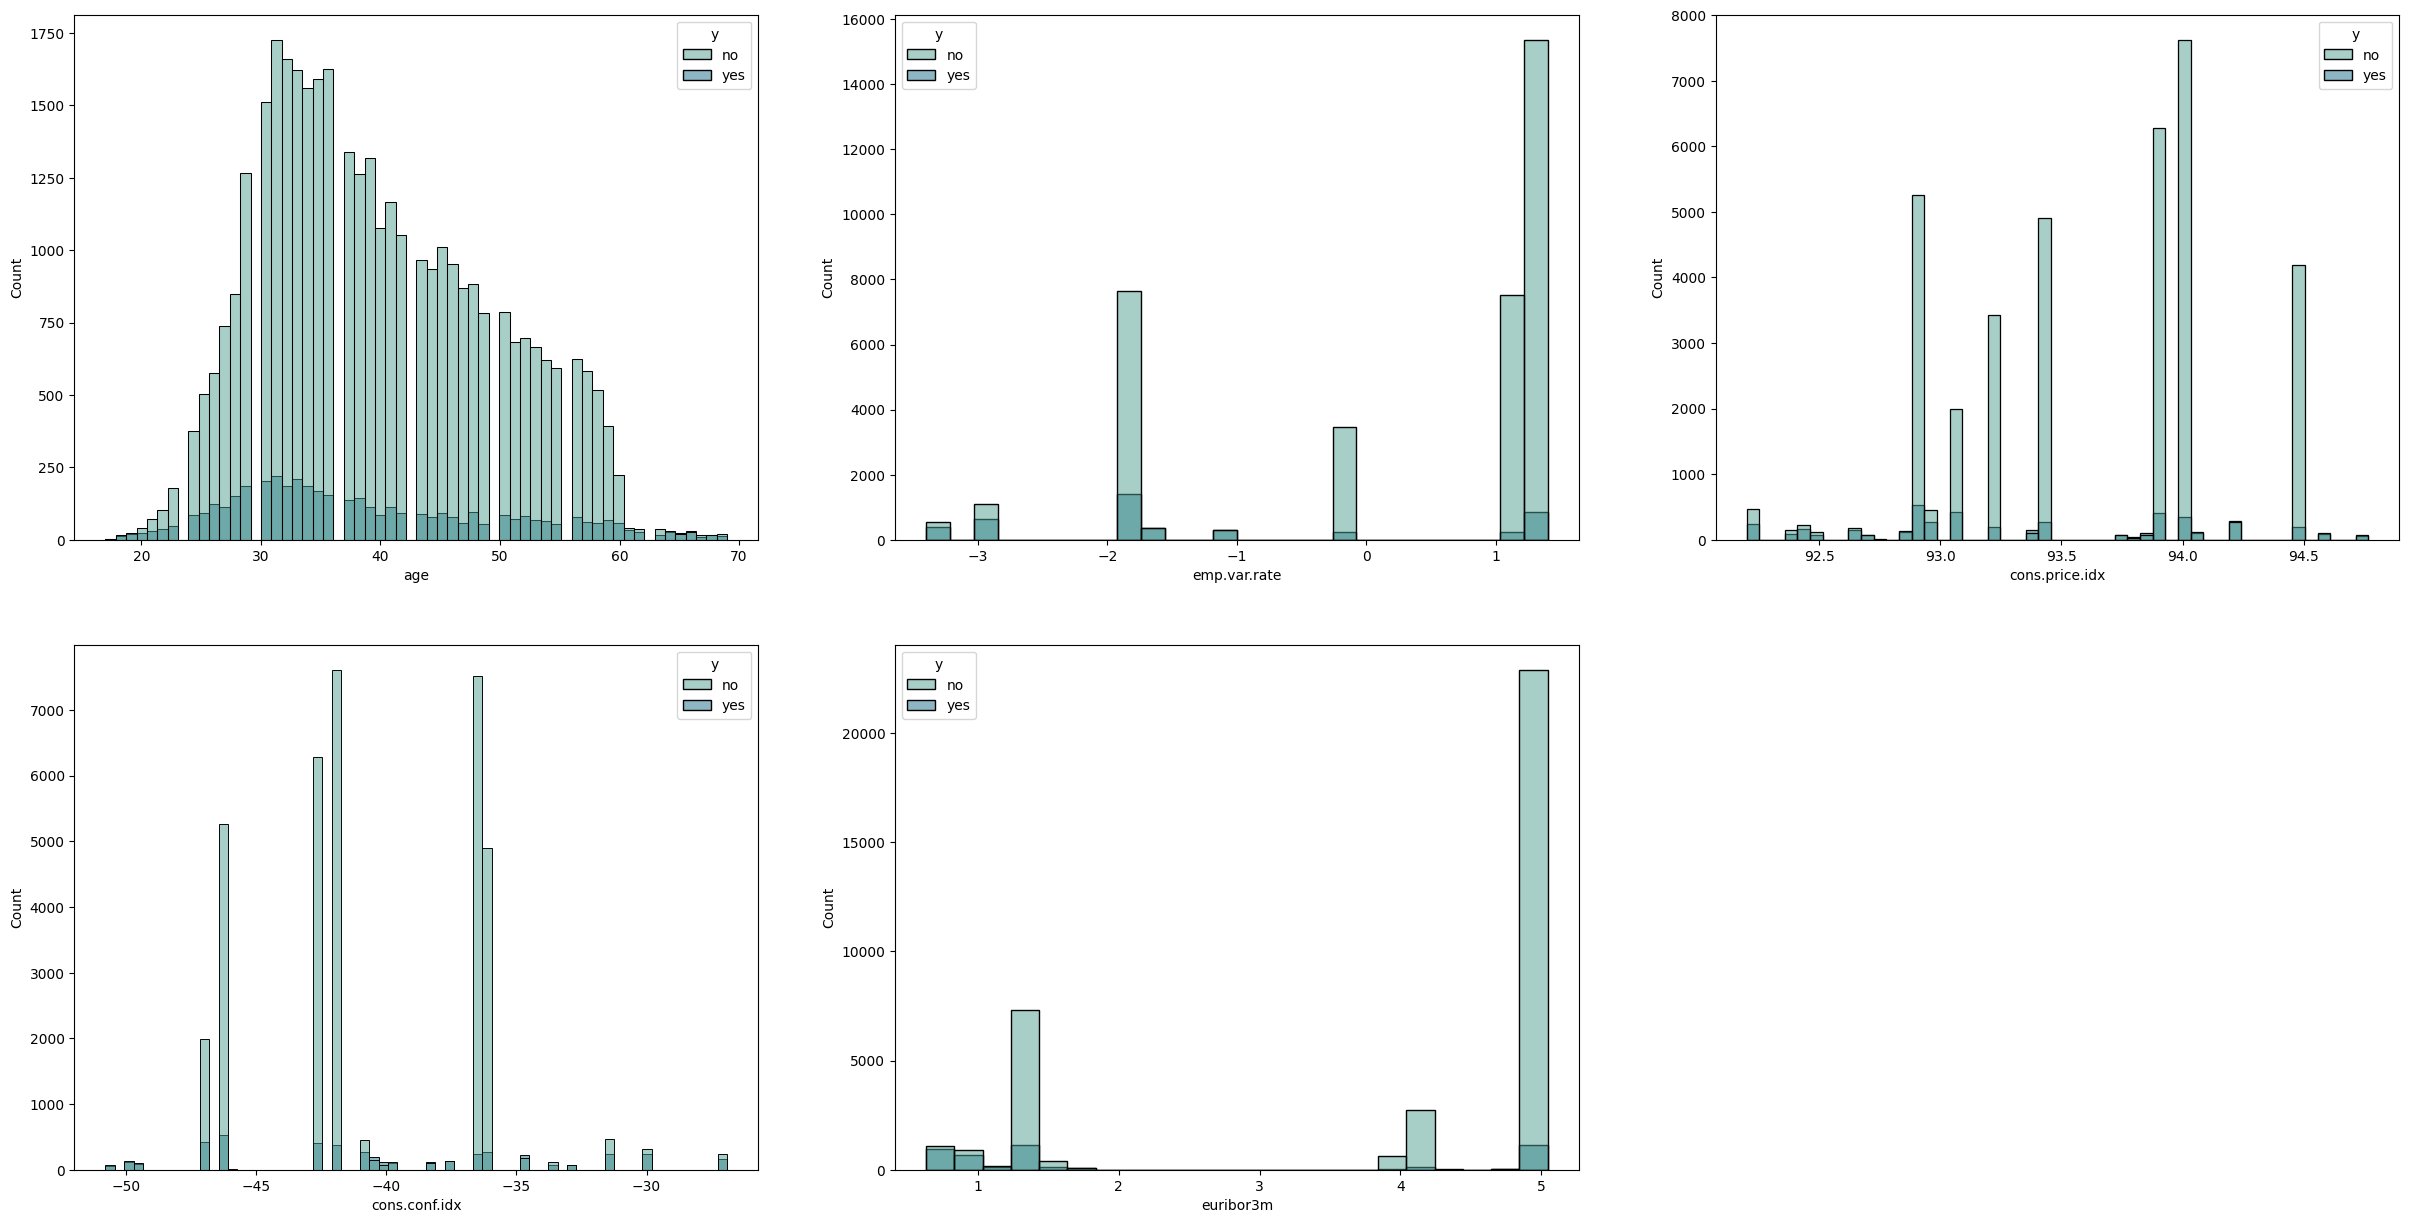

In [18]:
# Now we are going to analyze the numerical variables
# Relationship between the numerical variables and the target variable
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

# set the color palette
color = sns.color_palette("crest", as_cmap=True)

# Histogram of the age column
sns.histplot(ax = ax[0,0], data = bank_marketing_campaign_df, x = 'age', hue = 'y', palette="crest")
# Histogram of the poutcome column
sns.histplot(ax = ax[0,1], data = bank_marketing_campaign_df, x = 'emp.var.rate', hue = 'y', palette="crest")
# Histogram of the cons.price.idx column
sns.histplot(ax = ax[0,2], data = bank_marketing_campaign_df, x = 'cons.price.idx', hue = 'y', palette="crest")
# Histogram of the cons.conf.idx column
sns.histplot(ax = ax[1,0], data = bank_marketing_campaign_df, x = 'cons.conf.idx', hue = 'y', palette="crest")
# Histogram of the euribor3m column
sns.histplot(ax = ax[1,1], data = bank_marketing_campaign_df, x = 'euribor3m', hue = 'y', palette="crest")
# Remove the empty subplots
fig.delaxes(ax[1,2])

# Display the plot
plt.show()

In [14]:
# Feature engineering

# We need to group the categories basic.4y, basic.6y and basic.9y into a single category called basic
bank_marketing_campaign_df['education'] = bank_marketing_campaign_df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')

# Now, we need to eliminate the outliers of the age column
# Calculate the IQR
Q1 = bank_marketing_campaign_df['age'].quantile(0.25)
Q3 = bank_marketing_campaign_df['age'].quantile(0.75)
IQR = Q3 - Q1

# Eliminate the outliers
bank_marketing_campaign_df = bank_marketing_campaign_df[~((bank_marketing_campaign_df['age'] < (Q1 - 1.5 * IQR)) |(bank_marketing_campaign_df['age'] > (Q3 + 1.5 * IQR)))]

In [22]:
# Now, we are going to scale the variables with the MinMaxScaler

# Convert all the categorical variables into numerical variables with factorize method
bank_marketing_campaign_df['job_n'] = pd.factorize(bank_marketing_campaign_df['job'])[0]
bank_marketing_campaign_df['marital_n'] = pd.factorize(bank_marketing_campaign_df['marital'])[0]
bank_marketing_campaign_df['education_n'] = pd.factorize(bank_marketing_campaign_df['education'])[0]
bank_marketing_campaign_df['default_n'] = pd.factorize(bank_marketing_campaign_df['default'])[0]
bank_marketing_campaign_df['housing_n'] = pd.factorize(bank_marketing_campaign_df['housing'])[0]
bank_marketing_campaign_df['loan_n'] = pd.factorize(bank_marketing_campaign_df['loan'])[0]
bank_marketing_campaign_df['contact_n'] = pd.factorize(bank_marketing_campaign_df['contact'])[0]
bank_marketing_campaign_df['month_n'] = pd.factorize(bank_marketing_campaign_df['month'])[0]
bank_marketing_campaign_df['day_of_week_n'] = pd.factorize(bank_marketing_campaign_df['day_of_week'])[0]
bank_marketing_campaign_df['poutcome_n'] = pd.factorize(bank_marketing_campaign_df['poutcome'])[0]
bank_marketing_campaign_df['y_n'] = pd.factorize(bank_marketing_campaign_df['y'])[0]
numeric_columns = ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n',
                   'month_n', 'day_of_week_n', 'poutcome_n', 'y_n', 'age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

# Create the scaler
scaler = MinMaxScaler()

# Scale the variables
scale_feature = scaler.fit_transform(bank_marketing_campaign_df[numeric_columns])
bank_marketing_campaign_scaled_df = pd.DataFrame(scale_feature, index = bank_marketing_campaign_df.index, columns = numeric_columns)
bank_marketing_campaign_scaled_df.head()


/tmp/ipykernel_11601/4113091243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_marketing_campaign_df['job_n'] = pd.factorize(bank_marketing_campaign_df['job'])[0]
/tmp/ipykernel_11601/4113091243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_marketing_campaign_df['marital_n'] = pd.factorize(bank_marketing_campaign_df['marital'])[0]
/tmp/ipykernel_11601/4113091243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.9375,0.698753,0.60251,0.957379
1,0.090909,0.0,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.769231,0.9375,0.698753,0.60251,0.957379
2,0.090909,0.0,0.2,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.384615,0.9375,0.698753,0.60251,0.957379
3,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442308,0.9375,0.698753,0.60251,0.957379
4,0.090909,0.0,0.2,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.750000,0.9375,0.698753,0.60251,0.957379


In [29]:
# Feature selection

# Separate the features and the target variable
X = bank_marketing_campaign_scaled_df.drop(['y_n'], axis = 1)
y = bank_marketing_campaign_scaled_df['y_n']

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Select the best features with SelectKBest
best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(X, y)
ix = fit.get_support()

# Create a dataframe with the best features
X_test = pd.DataFrame(best_features.transform(X_test), index = X_test.index, columns = X_test.columns[ix])
X_train = pd.DataFrame(best_features.transform(X_train), index = X_train.index, columns = X_train.columns[ix])

# Display the dataframe
X_train.head()

,job_n,marital_n,education_n,default_n,contact_n,month_n,poutcome_n,emp.var.rate,cons.price.idx,euribor3m
21960,0.363636,0.000000,0.8,0.0,1.0,0.333333,0.0,1.000000,0.484412,0.981637
2958,0.272727,0.000000,0.0,0.0,0.0,0.000000,0.0,0.937500,0.698753,0.957833
32690,0.181818,0.333333,0.8,0.0,1.0,0.000000,1.0,0.333333,0.269680,0.150759
22667,0.363636,0.000000,0.4,0.0,1.0,0.333333,0.0,1.000000,0.484412,0.981637
22092,0.181818,0.333333,0.8,0.0,1.0,0.333333,0.0,1.000000,0.484412,0.981637


In [30]:
X_test.head()

,job_n,marital_n,education_n,default_n,contact_n,month_n,poutcome_n,emp.var.rate,cons.price.idx,euribor3m
1745,0.181818,0.000000,0.2,0.0,0.0,0.000000,0.0,0.937500,0.698753,0.956926
18919,0.272727,0.000000,0.0,0.5,1.0,0.333333,0.0,1.000000,0.484412,0.982997
5376,0.727273,0.333333,0.8,0.0,0.0,0.000000,0.0,0.937500,0.698753,0.957379
23157,0.181818,0.000000,0.8,0.0,1.0,0.333333,0.0,1.000000,0.484412,0.981864
33877,0.090909,0.666667,0.0,0.5,1.0,0.000000,0.0,0.333333,0.269680,0.146679


In [32]:
# We are going to add the target variable to the train and test dataframes
X_train['y_n'] = list(y_train)
X_test['y_n'] = list(y_test)

# Save the train and test dataframes
X_train.to_csv('../data/processed/X_train.csv', index = False)
X_test.to_csv('../data/processed/X_test.csv', index = False)